<a href="https://colab.research.google.com/github/Barryjuait/Barryjuait/blob/master/Personal%20Projects/Clinical_Data_on_Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# About Dataset
Detailed dataset comprising health and demographic data of 100,000 individuals, aimed at facilitating diabetes-related research and predictive modeling. This dataset includes information on gender, age, location, race, hypertension, heart disease, smoking history, BMI, HbA1c level, blood glucose level, and diabetes status.

##Dataset Use Cases

- Predictive Modeling: Build models to predict the likelihood of diabetes based on demographic and health-related features.
- Health Analytics: Analyze the correlation between different health metrics (e.g., BMI, HbA1c level) and diabetes.
- Demographic Studies: Examine the distribution of diabetes across different demographic groups and locations.
- Public Health Research: Identify risk factors for diabetes and target interventions to high-risk groups.
- Clinical Research: Study the relationship between comorbid conditions like hypertension and heart disease with diabetes.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, GlobalAveragePooling1D
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Set the path to the file you'd like to load
homeFolder = '/content/drive/MyDrive/Colab Notebooks/Diabetes/'
File = homeFolder + 'diabetes_dataset.csv'

df =pd.read_csv(File)

df.head()


,year,gender,age,location,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,smoking_history,bmi,hbA1c_level,blood_glucose_level,diabetes
0,2020,Female,32.0,Alabama,0,0,0,0,1,0,0,never,27.32,5.0,100,0
1,2015,Female,29.0,Alabama,0,1,0,0,0,0,0,never,19.95,5.0,90,0
2,2015,Male,18.0,Alabama,0,0,0,0,1,0,0,never,23.76,4.8,160,0
3,2015,Male,41.0,Alabama,0,0,1,0,0,0,0,never,27.32,4.0,159,0
4,2016,Female,52.0,Alabama,1,0,0,0,0,0,0,never,23.75,6.5,90,0


In [4]:
# Checking for missing values
print(df.isnull().sum())


year                    0
gender                  0
age                     0
location                0
race:AfricanAmerican    0
race:Asian              0
race:Caucasian          0
race:Hispanic           0
race:Other              0
hypertension            0
heart_disease           0
smoking_history         0
bmi                     0
hbA1c_level             0
blood_glucose_level     0
diabetes                0
dtype: int64


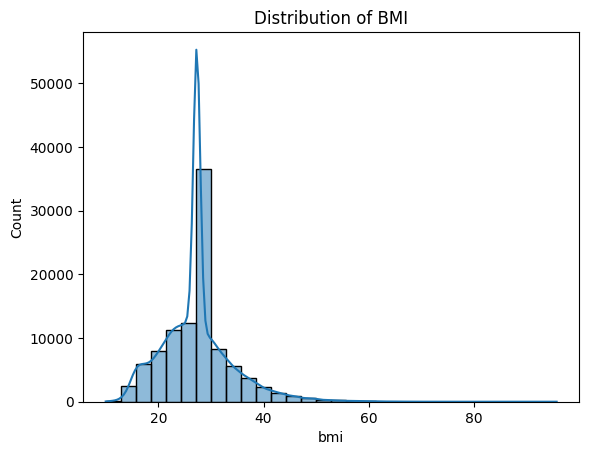

In [5]:
sns.histplot(df['bmi'], bins=30, kde=True)
plt.title('Distribution of BMI')
plt.show()

2.3 Diabetes Prevalence

Plot the proportion of diabetic vs. non-diabetic individuals.

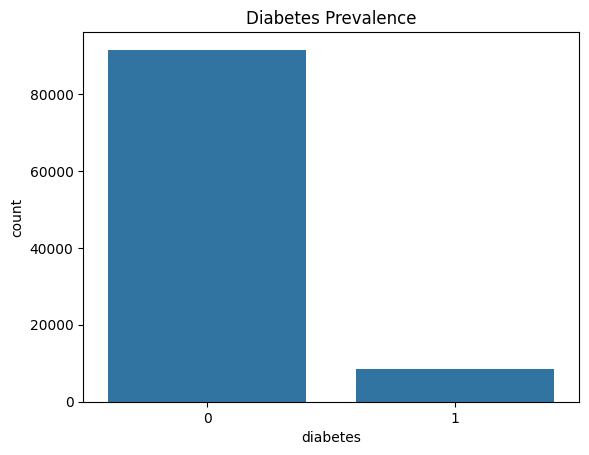

In [6]:
sns.countplot(x='diabetes', data=df)
plt.title('Diabetes Prevalence')
plt.show()

In [7]:
df.head()

,year,gender,age,location,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,smoking_history,bmi,hbA1c_level,blood_glucose_level,diabetes
0,2020,Female,32.0,Alabama,0,0,0,0,1,0,0,never,27.32,5.0,100,0
1,2015,Female,29.0,Alabama,0,1,0,0,0,0,0,never,19.95,5.0,90,0
2,2015,Male,18.0,Alabama,0,0,0,0,1,0,0,never,23.76,4.8,160,0
3,2015,Male,41.0,Alabama,0,0,1,0,0,0,0,never,27.32,4.0,159,0
4,2016,Female,52.0,Alabama,1,0,0,0,0,0,0,never,23.75,6.5,90,0


In [14]:
#check for ethnicities
colNames = list(df.columns)
race_cols = [col for col in colNames if 'race' in col.lower()]
race_cols

['race:AfricanAmerican',
 'race:Asian',
 'race:Caucasian',
 'race:Hispanic',
 'race:Other']

In [22]:
df['Ethnicity'] = 'Other'

for ix, ethn in enumerate(race_cols):
    group = ethn.split(':')[1]
    df['Ethnicity'][df[ethn] == 1] = group

df['Ethnicity'].astype('category')
df.drop(columns=race_cols, inplace=True)
df.head()

,year,gender,age,location,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,smoking_history,bmi,hbA1c_level,blood_glucose_level,diabetes,Ethnicity
0,2020,Female,32.0,Alabama,0,0,0,0,1,0,0,never,27.32,5.0,100,0,Other
1,2015,Female,29.0,Alabama,0,1,0,0,0,0,0,never,19.95,5.0,90,0,Asian
2,2015,Male,18.0,Alabama,0,0,0,0,1,0,0,never,23.76,4.8,160,0,Other
3,2015,Male,41.0,Alabama,0,0,1,0,0,0,0,never,27.32,4.0,159,0,Caucasian
4,2016,Female,52.0,Alabama,1,0,0,0,0,0,0,never,23.75,6.5,90,0,AfricanAmerican


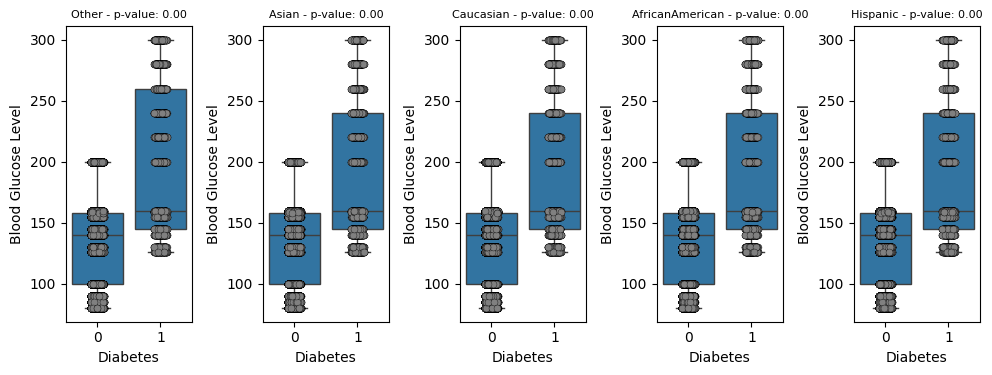

In [60]:
from scipy.stats import ttest_ind

groups = list(df.Ethnicity.unique())
fig, ax = plt.subplots(1, len(groups), figsize=(10, 4))
for ix, ethn in enumerate(groups):

  diabetic = df[(df['diabetes'] == 1) & (df['Ethnicity'] == ethn)]['blood_glucose_level']
  non_diabetic = df[(df['diabetes'] == 0) & (df['Ethnicity'] == ethn)]['blood_glucose_level']

  stat, p_value = ttest_ind(diabetic, non_diabetic)
  #print(f"T-test p-value: {p_value}")
  sns.boxplot(data = df[df['Ethnicity'] == ethn], ax = ax[ix], x = 'diabetes', y = 'blood_glucose_level')
  sns.stripplot(data = df[df['Ethnicity'] == ethn], ax = ax[ix], x = 'diabetes', y = 'blood_glucose_level', color = '.5', edgecolor='k', linewidth = 0.25)
  ax[ix].set_title(f'Ethnicity: {ethn}')
  ax[ix].set_xlabel('Diabetes')
  ax[ix].set_ylabel('Blood Glucose Level')
  ax[ix].set_title(f'{ethn} - p-value: {p_value:.2f}', fontsize = 8)
    #ax[ix].set_ylim(0, 300)
plt.suptitle('')
plt.tight_layout()
plt.show()

Chi-square test p-value: 0.0


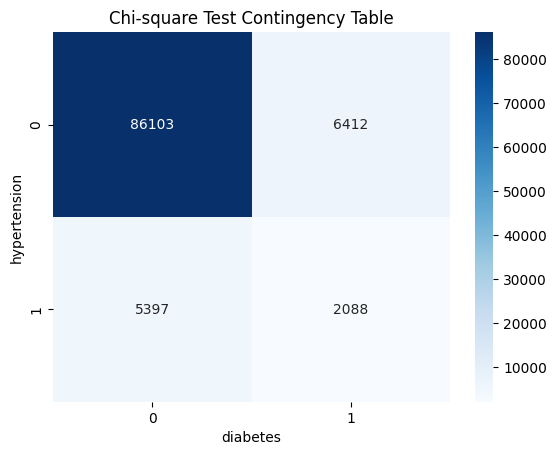

In [61]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df['hypertension'], df['diabetes'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-square test p-value: {p}")

sns.heatmap(contingency_table, annot=True, cmap='Blues', fmt='d')
plt.title('Chi-square Test Contingency Table')
plt.show()

4. Machine Learning Approaches

4.1 Feature Engineering

Encode categorical variables (e.g., gender, race, smoking history) using one-hot encoding or label encoding.

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_enc = LabelEncoder()
df['gender'] = label_enc.fit_transform(df['gender'])
df['smoking_history'] = label_enc.fit_transform(df['smoking_history'])


4.2 Splitting Data

Split the dataset into training and test sets (80/20 split).

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['diabetes', 'age', 'location', 'race:AfricanAmerican',
       'race:Asian', 'race:Caucasian', 'race:Hispanic', 'race:Other'])
y = df['diabetes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

4.3 Model Training

Train a logistic regression model as a baseline classifier.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

4.4 Model Evaluation

Evaluate model performance using accuracy, precision, recall, and F1-score.

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

5. Conclusion

Summarize key findings from EDA and statistical tests.

Highlight significant predictors of diabetes.

Discuss potential next steps, such as improving the model or incorporating additional features.